In [ ]:
c:\users\tsion\appdata\roaming\python\python312\site-packages!pip install tensorflow keras matplotlib opencv-python


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
    --------------------------------------- 0.8/39.5 MB 2.1 MB/s eta 0:00:19
   - -------------------------------------- 1.6/39.5 MB 2.2 MB/s eta 0:00:18
   - -------------------------------------- 1.8/39.5 MB 2.1 MB/s eta 0:00:18
   -- ------------------------------------- 2.6/39.5 MB 2.4 MB/s eta 0:00:16
   --- ------------------------------------ 3.7/39.5 MB 2.8 MB/s eta 0:00:13
   ---- ----------------------------------- 4.2/39.5 MB 2.8 MB/s eta 0:00:13
   ---- ----------------------------------- 4.7/39.5 MB 2.8 MB/s eta 0:00:13
   ----- ---------------------------------- 5.8/39.5 MB 3.0 MB/s eta 0:00:12
   ------ ----------------

Step 2: Load & Preprocess the Dataset

In [14]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path
dataset_path = "C:/Users/tsion/.cache/kagglehub/datasets/drgfreeman/rockpaperscissors/versions/2"

print(os.listdir(dataset_path))  # Should list 'rock', 'paper', 'scissors'

# Define image size
IMG_SIZE = 64

# Create training & validation data generators
datagen = ImageDataGenerator(
    rescale=1.0/255,   # Normalize pixel values
    validation_split=0.2,  # Split data into training & validation (80%-20%)
    rotation_range=20,  
    horizontal_flip=True
)

# Load train data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load validation data
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Check data classes
print("Classes:", train_generator.class_indices)


['paper', 'README_rpc-cv-images.txt', 'rock', 'rps-cv-images', 'scissors']
Found 3502 images belonging to 4 classes.
Found 874 images belonging to 4 classes.
Classes: {'paper': 0, 'rock': 1, 'rps-cv-images': 2, 'scissors': 3}


Step 3: Visualize Sample Images

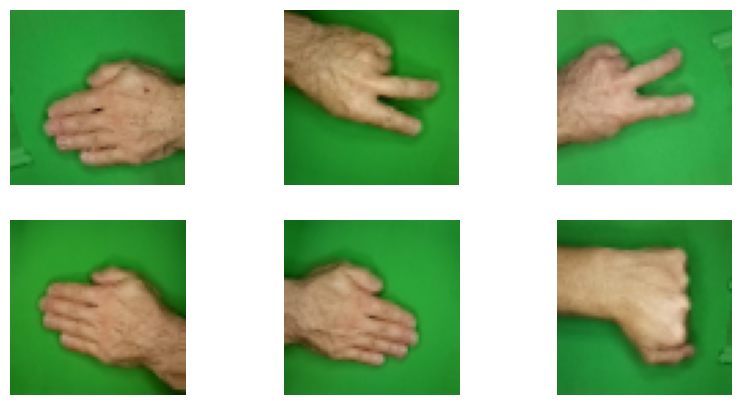

In [12]:
def show_sample_images(generator):
    images, labels = next(generator)  # Get batch of images
    plt.figure(figsize=(10, 5))
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i])
        plt.axis("off")
    plt.show()

show_sample_images(train_generator)


Step 4 - Implement First Optimizers
A simple CNN for classification:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: Rock, Paper, Scissors
])

model.summary()
